<a href="https://colab.research.google.com/github/Jun-Liu-291/cat-dog-CNN/blob/master/cat%26dog_v3_batchsize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models

# 4-layers Convnet & 2-layers Fully connected Dense with MaxPooling no regulerzation and dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from keras import optimizers
import tensorflow as tf

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 - 1e-3 * (2* epoch / 100))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

# tune batch size
batch_size = 100
epoch_lenth = 30
image_size = (150, 150)
train_step_per_epochs = int(2000 / batch_size)
validation_step_per_epochs = int(1000 / batch_size)

# cats and dogs data set downloaded from www.kaggle.com/c/dogs-vs-cats/data
# Using make_small_dataset.py separate small data set
# 2000 images as Training set
# 1000 images as Validation set
# 1000 images as Test set
train_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/train'
validation_dir = '/content/drive/My Drive/dataset/cats&dogs/small_dataset/validation'

# no data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs
)

Epoch 1/30
50/50 [==============================] - 683s 14s/step - loss: 0.9109 - acc: 0.5305 - val_loss: 0.6924 - val_acc: 0.6150
Epoch 2/30
50/50 [==============================] - 103s 2s/step - loss: 0.6979 - acc: 0.5200 - val_loss: 0.6818 - val_acc: 0.5920
Epoch 3/30
50/50 [==============================] - 102s 2s/step - loss: 0.6969 - acc: 0.5815 - val_loss: 0.6536 - val_acc: 0.6550
Epoch 4/30
50/50 [==============================] - 102s 2s/step - loss: 0.6291 - acc: 0.6500 - val_loss: 0.6441 - val_acc: 0.6200
Epoch 5/30
50/50 [==============================] - 102s 2s/step - loss: 0.6068 - acc: 0.6880 - val_loss: 0.5760 - val_acc: 0.6880
Epoch 6/30
50/50 [==============================] - 102s 2s/step - loss: 0.5580 - acc: 0.7210 - val_loss: 0.5901 - val_acc: 0.6610
Epoch 7/30
50/50 [==============================] - 102s 2s/step - loss: 0.5390 - acc: 0.7320 - val_loss: 0.6069 - val_acc: 0.6680
Epoch 8/30
50/50 [==============================] - 102s 2s/step - loss: 0.4616 - 

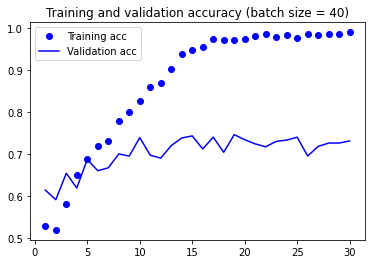

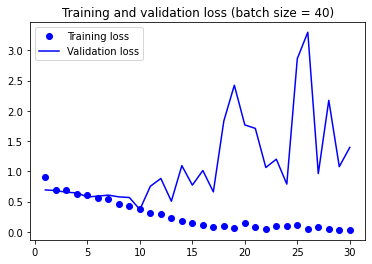

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (batch size = 40)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (batch size = 40)')
plt.legend()
plt.show()

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs
)

Epoch 1/30
33/33 [==============================] - 99s 3s/step - loss: 0.9807 - acc: 0.5005 - val_loss: 0.6903 - val_acc: 0.5823
Epoch 2/30
33/33 [==============================] - 99s 3s/step - loss: 0.8185 - acc: 0.5428 - val_loss: 0.6821 - val_acc: 0.6298
Epoch 3/30
33/33 [==============================] - 98s 3s/step - loss: 0.6916 - acc: 0.5639 - val_loss: 0.6621 - val_acc: 0.5468
Epoch 4/30
33/33 [==============================] - 98s 3s/step - loss: 0.6950 - acc: 0.6062 - val_loss: 0.6613 - val_acc: 0.6213
Epoch 5/30
33/33 [==============================] - 98s 3s/step - loss: 0.6393 - acc: 0.6495 - val_loss: 0.6514 - val_acc: 0.6245
Epoch 6/30
33/33 [==============================] - 98s 3s/step - loss: 0.6563 - acc: 0.6608 - val_loss: 0.5815 - val_acc: 0.6649
Epoch 7/30
33/33 [==============================] - 98s 3s/step - loss: 0.5549 - acc: 0.7134 - val_loss: 0.5420 - val_acc: 0.6819
Epoch 8/30
33/33 [==============================] - 98s 3s/step - loss: 0.5379 - acc: 0.71

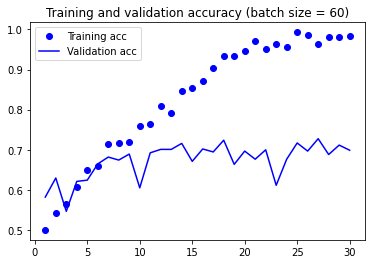

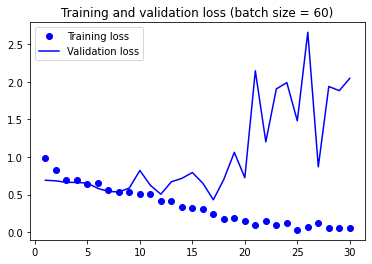

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (batch size = 60)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (batch size = 60)')
plt.legend()
plt.show()

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_step_per_epochs,
    epochs = epoch_lenth,
    validation_data=validation_generator,
    validation_steps = validation_step_per_epochs
)

Epoch 1/30
20/20 [==============================] - 108s 5s/step - loss: 0.8290 - acc: 0.5010 - val_loss: 0.6916 - val_acc: 0.5760
Epoch 2/30
20/20 [==============================] - 102s 5s/step - loss: 0.7003 - acc: 0.5135 - val_loss: 0.6831 - val_acc: 0.5000
Epoch 3/30
20/20 [==============================] - 103s 5s/step - loss: 0.7016 - acc: 0.5070 - val_loss: 0.6914 - val_acc: 0.5010
Epoch 4/30
20/20 [==============================] - 100s 5s/step - loss: 0.6917 - acc: 0.5480 - val_loss: 0.6918 - val_acc: 0.5130
Epoch 5/30
20/20 [==============================] - 100s 5s/step - loss: 0.6800 - acc: 0.5765 - val_loss: 0.6395 - val_acc: 0.6070
Epoch 6/30
20/20 [==============================] - 103s 5s/step - loss: 0.6900 - acc: 0.6075 - val_loss: 0.6383 - val_acc: 0.5840
Epoch 7/30
20/20 [==============================] - 101s 5s/step - loss: 0.6075 - acc: 0.6420 - val_loss: 0.7499 - val_acc: 0.5950
Epoch 8/30
20/20 [==============================] - 100s 5s/step - loss: 0.6705 - a

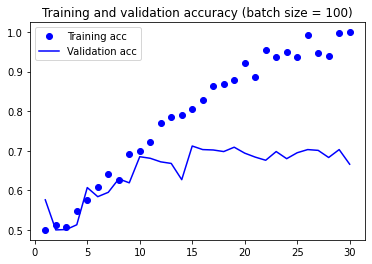

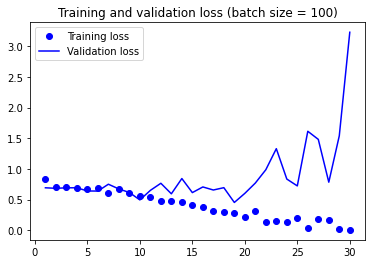

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy (batch size = 100)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (batch size = 100)')
plt.legend()
plt.show()

I want to try different batch size to check which best batch size would have the best result.

Increase batch size:
A. advantage:
  1. Increase the utilization of RAM, since all the input data are vector, within the ability of RAM, a larger batch size let more training data fit in the model in the same time.
  2. Using larger batch size decrease the number of interation for each epoches, which means go through all the training data will spand shorter time.
  3. Using large batch size can make each steps of changing weight w and bias b has a closer direction to all training data.

B. disadvantage:
  1. Our RAM might not have the ability to solve such a big batch size.
  2. Since the number of iteration in each epochs decreases, for each epochs, parameters change less times. To get the same loss function, using larger batch size might take more epochs

In summery:
1. for different size of training dats, batch size can vary from tens to hundreds. My training data has 2000 images, so my batch size for this model should be tens. Therefore I tried 20, 40, 60, 100. By setting batch size as 40 has the best results (The shock of the chart is not big, and has more iteration in each epochs)
2. When training model on more complicated problems (like multiclass classification), the training might not converge by using small batch size.
3. Too large batch size might lead the model to a local minimum point.